In [1]:
import os
import torch
import torch.utils.data as util_data
from torchvision import transforms
from network import *
from PIL import Image
from matplotlib import pyplot as plt
torch.multiprocessing.set_sharing_strategy('file_system')
from DHN import get_config
import numpy as np
from utils.tools import *
%matplotlib inline

In [2]:
bit = 48
config = get_config()
model = config["net"](bit)
trn_binary = np.load(os.path.join(config["save_path"],"nuswide_210.8152555594699427-trn_binary.npy"))
model.load_state_dict(torch.load(os.path.join(config["save_path"],"nuswide_21-0.8152555594699427-model.pt"),map_location='cpu'))
model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (hash_layer): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_feature

In [3]:
transform =  transforms.Compose([transforms.Resize(256),
                               transforms.CenterCrop(224),
                               transforms.ToTensor(),
                               transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                    std=[0.229, 0.224, 0.225])
                               ])
_, _, dataset_loader, num_train, num_test = get_data(config)
imgs_path_list = [imgs[0] for imgs in dataset_loader.dataset.imgs]

train_set 10500
test 2100
database 149736


In [4]:
def img_retrieval(img,num=10):
    img = transform(img)
    output = model(img.unsqueeze(0))
    qB = torch.sign(output).data
    hamm = CalcHammingDist(qB,  trn_binary)[0]
    ind = np.argsort(hamm)
    hamm=hamm[ind[:num]]
    imgs_path_array = np.array(imgs_path_list)
    retrieval_res = imgs_path_array[ind][:num]
    return retrieval_res,hamm.astype(np.int)

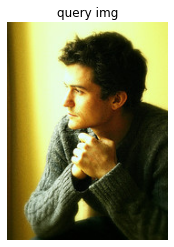

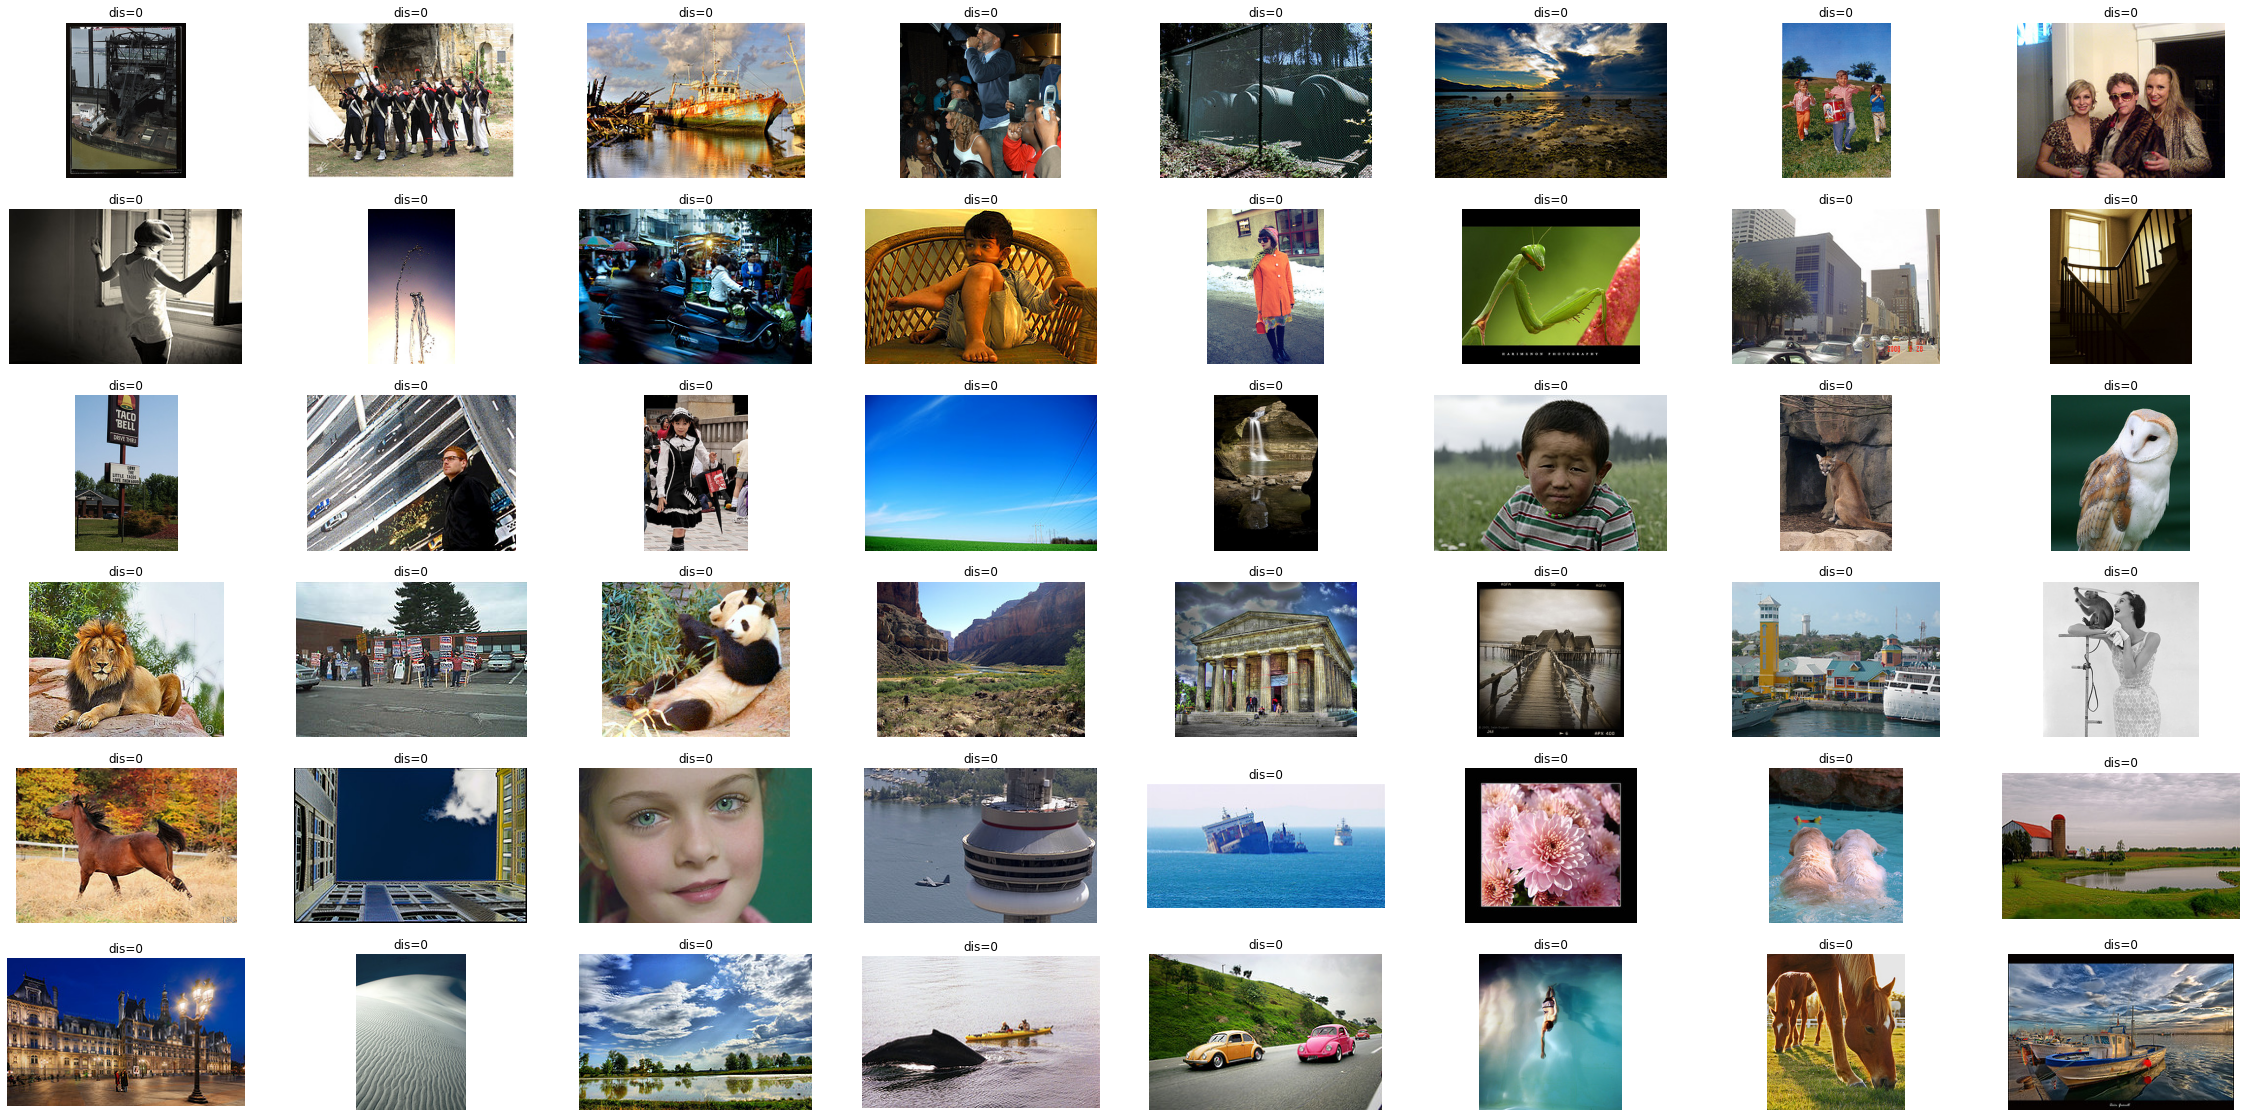

In [5]:
img = Image.open("X:/code/remote/sh/dataset/nus_wide/images/112_2216642703_69fba6f939_m.jpg").convert('RGB')
plt.imshow(img)
plt.axis('off')
plt.title("query img")
plt.show()
return_img_list,hamm = img_retrieval(img,num=48)
plt.figure(figsize=(40,20))
for index,img_path in  enumerate(return_img_list):
    plt.subplot(6, 8, index+1)
    img = Image.open(img_path).convert('RGB')
    plt.title("dis=%d"%hamm[index])
    plt.axis('off')
    plt.imshow(img)
plt.show()

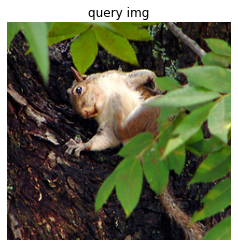

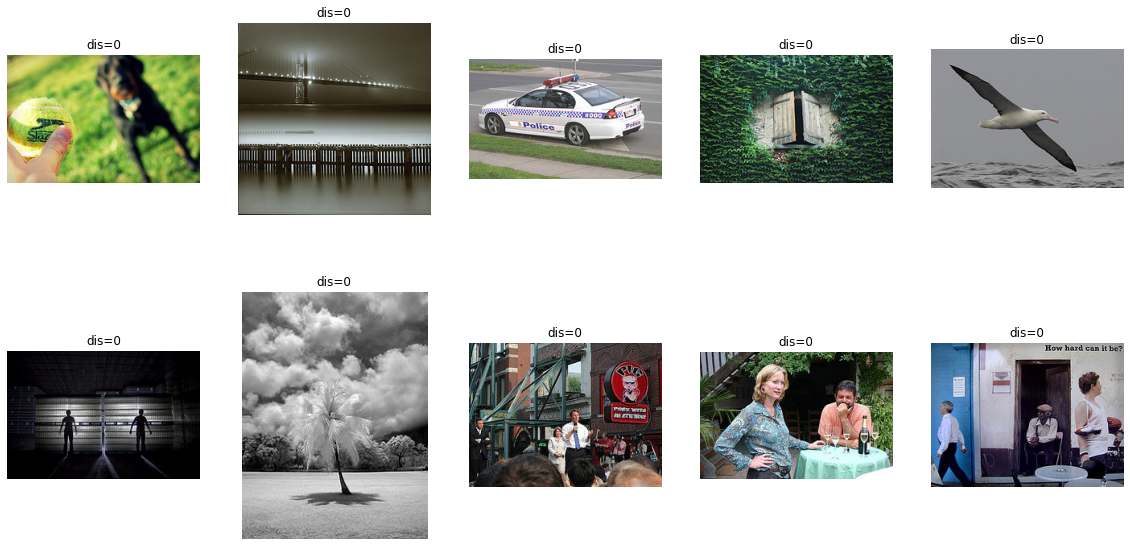

In [6]:
img = Image.open("X:/code/remote/sh/dataset/nus_wide/images/430_203369385_fb21bb3b12_m.jpg").convert('RGB')
plt.imshow(img)
plt.axis('off')
plt.title("query img")
plt.show()
return_img_list,hamm = img_retrieval(img,num=10)
plt.figure(figsize=(20,10))
for index,img_path in  enumerate(return_img_list):
    plt.subplot(2, 5, index+1)
    img = Image.open(img_path).convert('RGB')
    plt.title("dis=%d"%hamm[index])
    plt.axis('off')
    plt.imshow(img)
plt.show()

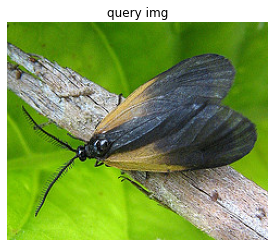

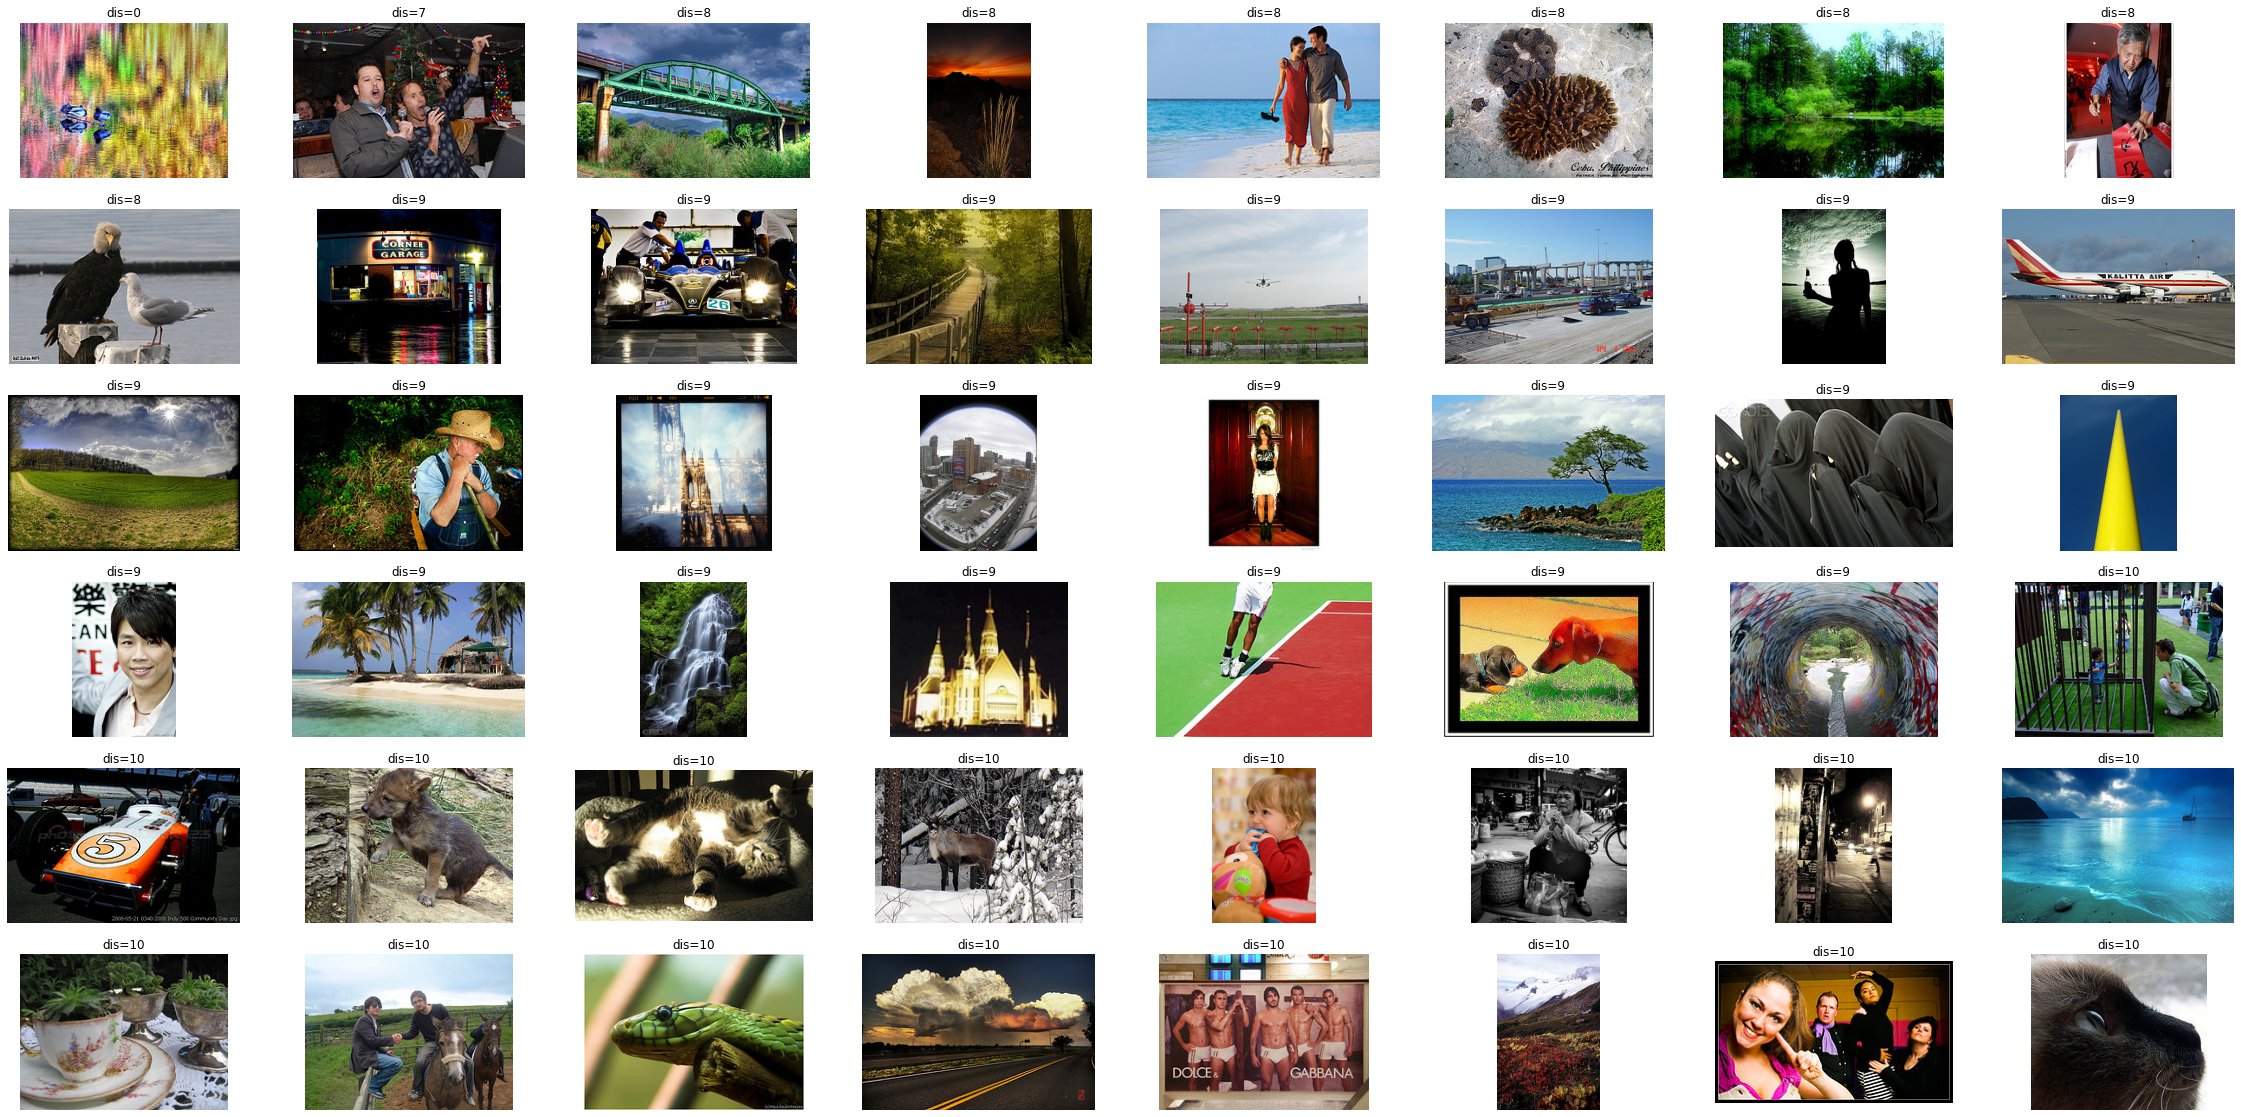

In [8]:
img = Image.open("X:/code/remote/sh/dataset/nus_wide/images/681_148133827_f657e4019c_m.jpg").convert('RGB')
plt.imshow(img)
plt.axis('off')
plt.title("query img")
plt.show()
return_img_list,hamm = img_retrieval(img,num=48)
plt.figure(figsize=(40,20))
for index,img_path in  enumerate(return_img_list):
    plt.subplot(6, 8, index+1)
    img = Image.open(img_path).convert('RGB')
    plt.title("dis=%d"%hamm[index])
    plt.axis('off')
    plt.imshow(img)
plt.savefig('result.png')
plt.show()